<a href="https://colab.research.google.com/github/anshudaur/TensorFlowProjects/blob/master/Emnist_CNN.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [2]:
# Check if already downloaded
check = !if [ -d 'dataset/' ]; then echo "1" ; else echo "0"; fi
if (check[0] is '0' ):
  !mkdir dataset
  !wget 'https://www.itl.nist.gov/iaui/vip/cs_links/EMNIST/matlab.zip'
  !unzip matlab.zip -d /content/dataset

--2019-10-14 07:28:59--  https://www.itl.nist.gov/iaui/vip/cs_links/EMNIST/matlab.zip
Resolving www.itl.nist.gov (www.itl.nist.gov)... 132.163.4.36, 2610:20:6b01:4::36
Connecting to www.itl.nist.gov (www.itl.nist.gov)|132.163.4.36|:443... connected.
HTTP request sent, awaiting response... 200 OK
Length: 743900280 (709M) [application/zip]
Saving to: ‘matlab.zip’

matlab.zip          100%[===================>] 709.44M  91.4MB/s    in 8.4s    

2019-10-14 07:29:08 (84.4 MB/s) - ‘matlab.zip’ saved [743900280/743900280]

Archive:  matlab.zip
  inflating: /content/dataset/matlab/emnist-balanced.mat  
  inflating: /content/dataset/matlab/emnist-byclass.mat  
  inflating: /content/dataset/matlab/emnist-bymerge.mat  
  inflating: /content/dataset/matlab/emnist-digits.mat  
  inflating: /content/dataset/matlab/emnist-letters.mat  
  inflating: /content/dataset/matlab/emnist-mnist.mat  


**Load Dataset by Class**

Found GPU at: /device:GPU:0
(697932, 784)
(697932, 1)
(697932, 62)
(116323, 62)
[0. 0. 0. 0. 0. 1. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0.
 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0.
 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0.]
(116323, 1)


(116323,)

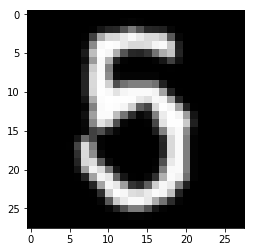

In [7]:
import os                    # Load os
import tensorflow as tf
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import Dense, Dropout, Activation, Flatten, Conv2D, MaxPooling2D
import scipy
#from scipy import io as spio

import numpy as np
%matplotlib inline

#!wget https://drive.google.com/open?id=1rBdVtgosojt33qzTKBYt2h5m-peP3B7L

# Check if GPU is available
import tensorflow as tf
device_name = tf.test.gpu_device_name()
if device_name != '/device:GPU:0':
  raise SystemError('GPU device not found, to activate the GPU go to menu "Runtime" and submenu "Change runtime type", then change hardware accelerator from None to GPU.')
print('Found GPU at: {}'.format(device_name))

#emnist = spio.loadmat("/content/dataset/matlab/emnist-byclass.mat")
emnist = scipy.io.loadmat("/content/emnist-byclass.mat")

# load training dataset
x_train = emnist["dataset"][0][0][0][0][0][0]
x_train = x_train.astype(np.float32)

# load training labels
y_train = emnist["dataset"][0][0][0][0][0][1]

# load test dataset
x_test = emnist["dataset"][0][0][1][0][0][0]
x_test = x_test.astype(np.float32)

# load test labels
y_test = emnist["dataset"][0][0][1][0][0][1]

# store labels for visualization
train_labels = y_train
test_labels = y_test

print (x_train.shape)
print (y_train.shape)

# Preprocess input data, reshape using matlab order ?
x_train = x_train.reshape(x_train.shape[0], 28, 28, 1, order="A")
x_test = x_test.reshape(x_test.shape[0], 28, 28, 1, order="A")

## normalized to 16 colours instead of 255
numberofcolors = 16
colors = 255//(numberofcolors-1)
x_train /= colors
x_test /= colors

x_train.shape

from keras.utils import np_utils

# Preprocess class labels
## EMNIST ByClass: 814,255 characters. 62 unbalanced classes.
## Convert 1-dimensional class arrays to 62-dimensional class matrices
class_idx = ['0','1','2','3','4','5','6','7','8','9',
             'A','B','C','D','E','F','G','H','I','J','K','L','M','N','O','P','Q','R','S','T','U','V','W','X','Y','Z',
             'a','b','c','d','e','f','g','h','i','j','k','l','m','n','o','p','q','r','s','t','u','v','w','x','y','z']
number_classes = 62
# retun binary representation(One hhot encoded vector) of integer matrix 
y_train = np_utils.to_categorical(y_train, number_classes )
y_test = np_utils.to_categorical(y_test,  number_classes )

print (y_train.shape)
print (y_test.shape)
samplenum = 12000 #label 5
import matplotlib.pyplot as plt
img = x_train[samplenum]
print(y_train[samplenum])
# visualize image
plt.imshow(img[:,:,0], cmap='gray')

# show label for sample image
index = train_labels[samplenum][0]

class_idx[ index ]

print ( test_labels.shape )
reshape = str(test_labels.shape).split(',')
reshape = int(reshape[0][1:])
test_labels = test_labels.reshape( reshape )
test_labels.shape

**generate augmented images**

1. ImageDataGenerator : Accepts original data, randomly transforms it and returns only the transformed data . Performs On-the-Fly data augmentation

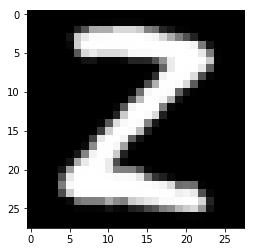

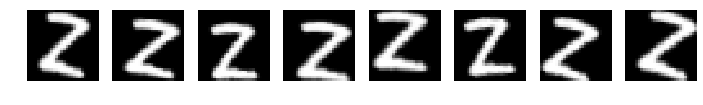

In [29]:
batch_size = 512
from keras.preprocessing.image import ImageDataGenerator

gen = ImageDataGenerator(rotation_range=12, width_shift_range=0.1, shear_range=0.3,
                        height_shift_range=0.1, zoom_range=0.1, data_format='channels_last')

train_batches = gen.flow(x_train, y_train, batch_size=batch_size)
test_batches = gen.flow(x_test, y_test, batch_size=batch_size)
steps_per_epoch = int(np.ceil(train_batches.n/batch_size))
validation_steps = int(np.ceil(test_batches.n/batch_size))

import matplotlib.pyplot as plt

# load ONE image from training set to display on screen
img = x_train[0] #image shape = (28,28,1)
#print(img.shape)
# visualize original image
plt.imshow(img[:,:,0], cmap='gray')
# trick our generator into believing img has enough dimensions
# and get some augmented images for our single test image
img = np.expand_dims(img, axis=0) # image shape = (1, 28, 28, 1)
#print(img.shape)
aug_iter = gen.flow(img)
aug_img = next(aug_iter)[0].astype(np.float32)  #aug_img shape is (28,28,1)
#print(aug_img[:,:,0].shape)

import matplotlib.pyplot as plt

# show augmented images
f = plt.figure(figsize=(12,6))
for i in range(8): # generate 8 augmented images
    sp = f.add_subplot(2, 26//3, i+1)
    sp.axis('Off')
    aug_img = next(aug_iter)[0].astype(np.float32)
    #aug_img[:,:,0] shape : (28, 28)
    plt.imshow(aug_img[:,:,0], cmap='gray')                 
    # images are stored as (img_size, image_size, channel)  to print call img [;,;,0]


**Build Model**

In [0]:
import os                    # Load os
import tensorflow as tf
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import Dense, Dropout, Activation, Flatten, Conv2D, MaxPooling2D

# x_train :(697932, 28, 28, 1)
# y_train : 697932
# Architecture model 

#  Input Vector :  784 pixels (28x28)
#  Layer 1      :  128 nodes
#  Layer 2      :  128 nodes
#  Output Layer :  62 categories

ly1_neurons = 128
ly2_neurons = 128
categories = 62

# Define model architecture
model = Sequential()

## Input: 28x28 images with 1 channel -> (28, 28, 1) tensors.

## First layer
# adds 128 neurons with 3x3 window size
model.add(Conv2D(ly1_neurons, (3,3), input_shape = x_train.shape[1:]))
# Activatior layer = relu (rectified linear regresion)    
model.add(Activation("relu"))                                             
model.add(MaxPooling2D(pool_size=(2,2)))
model.add(Dropout(0.2))

## Second layer
 # adds 128 neurons with 3x3 window size
model.add(Conv2D(ly2_neurons, (3,3))) 
 # Activatior layer = relu (rectified linear regresion)                                   
model.add(Activation("relu"))                                            
model.add(MaxPooling2D(pool_size=(2,2)))
model.add(Dropout(0.2))

## Third layer
model.add(Flatten())
 # to clasify in 62 classes
model.add(Dense( categories )) 
 # Activatior layer = sigmoid                                          
model.add(Activation('sigmoid'))                          

# Compile model
model.compile(loss='categorical_crossentropy',
            optimizer='adam',
            metrics=['accuracy'])



**Train** **Model**

In [31]:
#  Log to be reviewed with tensorboard for visualiztions
import time
from tensorflow.keras.callbacks import TensorBoard

#Define log name
log_name = 'EMNIST byClass-cnn-'+str (ly1_neurons) +'x'+ str(ly2_neurons)+'-{}'.format(int(time.time()))
tensorboard = TensorBoard(log_dir='logs/{}'.format(log_name))
!mkdir /content/logs

batch_size = 128
epochs = 10

# Fit model on training data 
history = model.fit(x_train, y_train
              , batch_size
              , epochs
              , verbose=1
              , callbacks = [tensorboard]
              , validation_data=(x_test, y_test)
             )

mkdir: cannot create directory ‘/content/logs’: File exists
Train on 697932 samples, validate on 116323 samples
Epoch 1/10
697932/697932 [==============================] - 157s 225us/sample - loss: 0.5236 - acc: 0.8249 - val_loss: 0.4128 - val_acc: 0.8551
Epoch 2/10
697932/697932 [==============================] - 156s 224us/sample - loss: 0.4169 - acc: 0.8525 - val_loss: 0.3926 - val_acc: 0.8595
Epoch 3/10
697932/697932 [==============================] - 156s 223us/sample - loss: 0.3950 - acc: 0.8582 - val_loss: 0.3833 - val_acc: 0.8628
Epoch 4/10
697932/697932 [==============================] - 156s 224us/sample - loss: 0.3838 - acc: 0.8615 - val_loss: 0.3787 - val_acc: 0.8655
Epoch 5/10
697932/697932 [==============================] - 156s 224us/sample - loss: 1.5989 - acc: 0.5981 - val_loss: 4.1271 - val_acc: 0.0497
Epoch 6/10
697932/697932 [==============================] - 156s 223us/sample - loss: 4.1271 - acc: 0.0496 - val_loss: 4.1271 - val_acc: 0.0497
Epoch 7/10
697932/697932

**Evaluate Final Accuracy**

In [32]:
# Evaluate model on test data
loss, accuracy = model.evaluate(x_test, y_test, verbose=0)
print ('Test loss ', loss )
print ('Test accuracy ', accuracy )

Test loss  4.1270988431692635
Test accuracy  0.049672034


**Save** **Model**

In [33]:
save_dir = '/content/'
model_name = 'model - '+str (ly1_neurons) +'x'+ str(ly2_neurons)+' bs:' + str(batch_size) +' ep:'+ str(epochs) +' acc:'+ str(round(accuracy, 3)) +' loss:' + str(round(loss, 3)) +' .h5'

model_path = os.path.join(save_dir, model_name)
model.save( model_path )
print ('Saved trained model at ' + model_path )

Saved trained model at /content/model - 128x128 bs:128 ep:10 acc:0.05 loss:4.127 .h5


**Predict Image**

Text(0.5, 1.0, 'Letter: y')

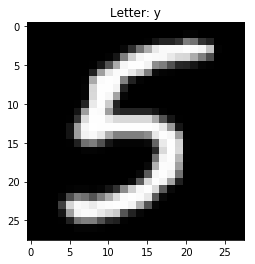

In [48]:
import random
image_index = random.randint(1,len(x_test))

image = x_test[image_index] # show label for sample image
plt.imshow(image[:,:,0], cmap='gray', interpolation='none')

image = np.expand_dims(image, axis=0)
scores = model.predict(image)

index = np.argmax(scores)
plt.title("Letter: " + str( class_idx[ index ] ))

**Plot Training History**

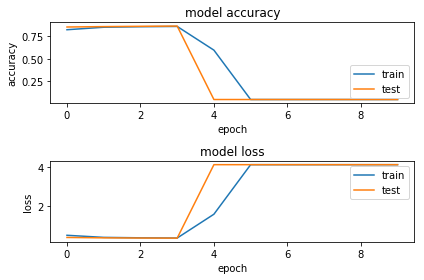

In [49]:
# plotting the metrics
fig = plt.figure()
plt.subplot(2,1,1)
plt.plot(history.history['acc'])
plt.plot(history.history['val_acc'])
plt.title('model accuracy')
plt.ylabel('accuracy')
plt.xlabel('epoch')
plt.legend(['train', 'test'], loc='lower right')

plt.subplot(2,1,2)
plt.plot(history.history['loss'])
plt.plot(history.history['val_loss'])
plt.title('model loss')
plt.ylabel('loss')
plt.xlabel('epoch')
plt.legend(['train', 'test'], loc='upper right')

plt.tight_layout()

  **

1.   Model Evaluation
2.   Visualize Correct Predictions
3.   Visualize Incorrect Predictions

**


5778  classified correctly
110545  classified incorrectly
Incorrect predictions
Incorrect predictions
Incorrect predictions
Incorrect predictions
Incorrect predictions
Incorrect predictions
Incorrect predictions
Incorrect predictions
Incorrect predictions
Incorrect predictions
Incorrect predictions
Incorrect predictions


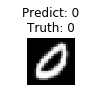

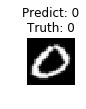

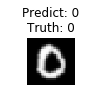

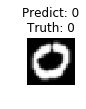

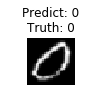

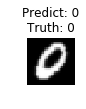

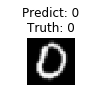

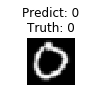

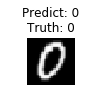

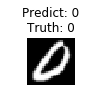

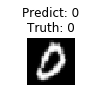

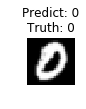

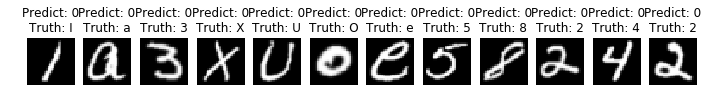

In [53]:
# load the model and create predictions on the test set
# model = load_model( model_name )
predicted_classes = model.predict_classes(x_test)

# see which we predicted correctly and which not
correct_indices = np.nonzero(predicted_classes == test_labels)[0]
incorrect_indices = np.nonzero(predicted_classes != test_labels)[0]
print()
print(len(correct_indices)," classified correctly")
print(len(incorrect_indices)," classified incorrectly")


fig = plt.figure(figsize=(12,6))
for i, correct in enumerate(correct_indices[:12]):
  rows = 2
  columns = 12
  sp = fig.add_subplot( rows, columns , i+1)                 # plot a matrix with 2 rows and 12 columns
  sp.axis('Off')                                             # removes background grill
  img = x_train[i]                                        
  plt.imshow(x_test[correct].reshape(28,28), cmap='gray', interpolation='none')  # prints image
  plt.title(
      'Predict: ' + str(class_idx[predicted_classes[correct]]) +
      '\nTruth: ' + str(class_idx[test_labels[correct]])
  )
  #fig = plt.figure(figsize=(12,6))
  print("Incorrect predictions")

for i, correct in enumerate(incorrect_indices[:12]):
  rows = 2
  columns = 12
  sp = fig.add_subplot( rows, columns , i+1)                 # plot a matrix with 2 rows and 12 columns
  sp.axis('Off')                                             # removes background grill
  img = x_train[i]                                        
  plt.imshow(x_test[correct].reshape(28,28), cmap='gray', interpolation='none')  # prints image
  plt.title(
      'Predict: ' + str(class_idx[predicted_classes[correct]]) +
      '\nTruth: ' + str(class_idx[test_labels[correct]])
  )